In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from scipy.stats import percentileofscore

In [2]:

import datetime
import pytz
from astral import LocationInfo
from astral.sun import sun, elevation
import matplotlib.pyplot as plt
import numpy as np

def plot_sun_elevation(latitude, longitude, timezone_str='UTC'):
    # Define location information
    location = LocationInfo("Custom Location", "Custom Region", timezone_str, latitude, longitude)

    # Get current date and time in the specified timezone
    timezone = pytz.timezone(timezone_str)
    today = datetime.datetime.now(tz=timezone)
    year, month, day = today.year, today.month, today.day

    # Calculate exact sunrise and sunset times
    s = sun(location.observer, date=today)

    # Convert sunrise and sunset times to local timezone
    sunrise_local = s['sunrise'].astimezone(timezone)
    sunset_local = s['sunset'].astimezone(timezone)

    # Convert sunrise and sunset times to indices
    sunrise_index = sunrise_local.hour * 60 + sunrise_local.minute
    sunset_index = sunset_local.hour * 60 + sunset_local.minute

    # Generate datetime objects for every minute of the day
    listahoras = [timezone.localize(datetime.datetime(year, month, day, hour, minute))
                  for hour in range(24) for minute in range(60)]

    # Calculate sun elevation for each minute
    elevaciones = [elevation(location.observer, dt) for dt in listahoras]

    # Find the index of the maximum elevation
    max_elevation_index = np.argmax(elevaciones)

    # Convert the maximum elevation index to a corresponding time
    max_elevation_time = listahoras[max_elevation_index].strftime('%H:%M')

    # Current time index
    current_time_index = today.hour * 60 + today.minute

    # Convert to numpy array for efficient plotting
    elevaciones_array = np.array(elevaciones)

    # Compute length of the day
    day_length_seconds = (sunset_local - sunrise_local).total_seconds()
    day_length_hours = int(day_length_seconds // 3600)  # Convert seconds to hours
    day_length_minutes = int((day_length_seconds % 3600) / 60)  # Extract remaining minutes

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

    # Plot the sun elevation profile
    ax.fill_between(np.arange(len(elevaciones)), elevaciones_array, where=elevaciones_array > 0, 
                    color='peachpuff', alpha=0.5)
    ax.fill_between(np.arange(len(elevaciones)), elevaciones_array, where=elevaciones_array < 0, 
                    color='lightblue', alpha=0.5)

    # Mark the current time
    current_elevation = elevaciones_array[current_time_index]
    ax.plot(current_time_index, current_elevation, 'o', color='darkblue', markersize=8, label='Current Position')

    # Format sunrise, sunset, and max elevation times as hh:mm
    sunrise_time = f"{sunrise_local.hour:02d}:{sunrise_local.minute:02d}"
    sunset_time = f"{sunset_local.hour:02d}:{sunset_local.minute:02d}"

    # Mark sunrise, sunset, and max elevation with labels
    ax.plot(sunrise_index, 0, marker='o', color='gold', markersize=10)
    ax.text(sunrise_index, -10, sunrise_time, ha='center', fontsize=10, color='orange')

    ax.plot(sunset_index, 0, marker='o', color='darkorange', markersize=10)
    ax.text(sunset_index, -10, sunset_time, ha='center', fontsize=10, color='darkorange')

    ax.plot(max_elevation_index, elevaciones_array[max_elevation_index], 'o', color='red', markersize=8)
    ax.text(max_elevation_index, elevaciones_array[max_elevation_index] + 2, max_elevation_time, ha='center', fontsize=10, color='red')

    # Add labels and title
    ax.set_xlabel('Time of Day (hours)', fontsize=12, fontweight='light')
    ax.set_ylabel('Sun Elevation (degrees)', fontsize=12, fontweight='light')
    ax.set_title(f'Sun Elevation Profile | Date: {today.strftime("%Y-%m-%d")} | Day Length: {day_length_hours}h {day_length_minutes}m', 
                 fontsize=14, fontweight='bold')

    # Customize the x-axis labels to show hours
    hours = np.arange(0, len(elevaciones), 60)
    ax.set_xticks(hours)
    ax.set_xticklabels([str(i // 60) for i in hours], fontsize=10, fontweight='light')

    # Customize the y-axis labels
    ax.yaxis.set_tick_params(labelsize=10, labelcolor='grey', width=0.5)

    # Make the grid lines more subtle
    ax.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.7)

    # Remove unnecessary spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('grey')
        ax.spines[spine].set_linewidth(0.5)

    # Minimalist legend
    ax.legend(loc='upper left', frameon=False, fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()


#
#st.pyplot(plot_sun_elevation(40.41144776110279, -3.6787949052050672, 'Europe/Madrid'))

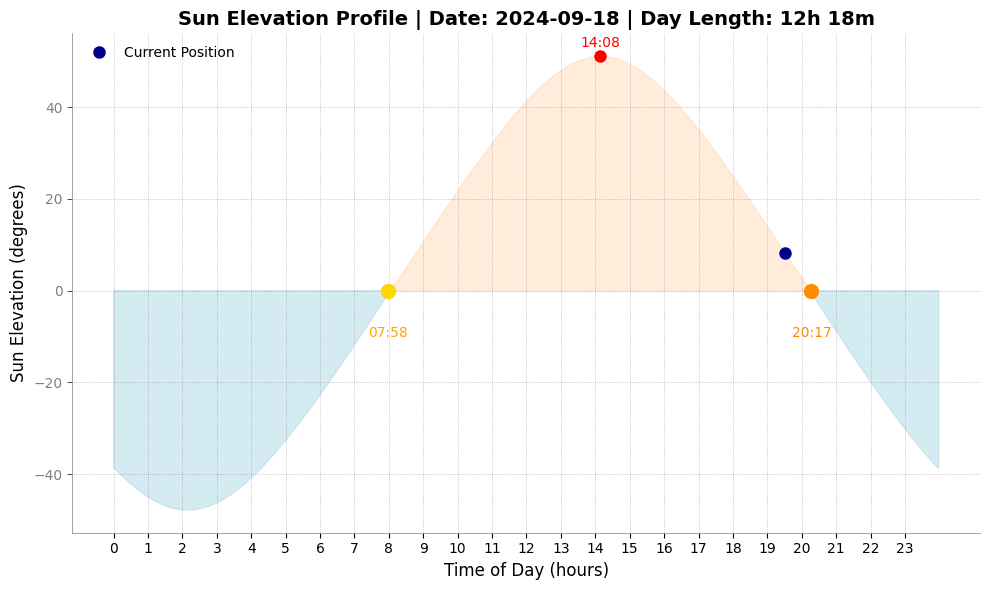

In [3]:
plot_sun_elevation(40.41144776110279, -3.6787949052050672, 'Europe/Madrid')

In [10]:
import datetime
import pytz
from astral import LocationInfo
from astral.sun import sun, elevation
import matplotlib.pyplot as plt
import numpy as np

def plot_sun_elevation(latitude, longitude, timezone_str='UTC'):
    # Define location information
    location = LocationInfo("Custom Location", "Custom Region", timezone_str, latitude, longitude)

    # Get current date and time in the specified timezone
    timezone = pytz.timezone(timezone_str)
    today = datetime.datetime.now(tz=timezone)
    yesterday = today - datetime.timedelta(days=1)
    year, month, day = today.year, today.month, today.day

    # Calculate exact sunrise and sunset times for today and yesterday
    s_today = sun(location.observer, date=today)
    s_yesterday = sun(location.observer, date=yesterday)

    # Convert sunrise and sunset times to local timezone
    sunrise_local = s_today['sunrise'].astimezone(timezone)
    sunset_local = s_today['sunset'].astimezone(timezone)

    # Calculate day length for today and yesterday
    day_length_today = (s_today['sunset'] - s_today['sunrise']).total_seconds()
    day_length_yesterday = (s_yesterday['sunset'] - s_yesterday['sunrise']).total_seconds()

    # Calculate the difference in day length
    day_length_diff = day_length_today - day_length_yesterday
    diff_minutes, diff_seconds = divmod(abs(int(day_length_diff)), 60)
    daylight_change = f"{diff_minutes} min {diff_seconds} seg {'ganados' if day_length_diff > 0 else 'perdidos'}"

    # Convert sunrise and sunset times to indices
    sunrise_index = sunrise_local.hour * 60 + sunrise_local.minute
    sunset_index = sunset_local.hour * 60 + sunset_local.minute

    # Generate datetime objects for every minute of the day
    listahoras = [timezone.localize(datetime.datetime(year, month, day, hour, minute))
                  for hour in range(24) for minute in range(60)]

    # Calculate sun elevation for each minute
    elevaciones = [elevation(location.observer, dt) for dt in listahoras]

    # Find the index of the maximum elevation
    max_elevation_index = np.argmax(elevaciones)

    # Convert the maximum elevation index to a corresponding time
    max_elevation_time = listahoras[max_elevation_index].strftime('%H:%M')

    # Current time index
    current_time_index = today.hour * 60 + today.minute

    # Convert to numpy array for efficient plotting
    elevaciones_array = np.array(elevaciones)

    # Compute length of the day
    day_length_seconds = (sunset_local - sunrise_local).total_seconds()
    day_length_hours = int(day_length_seconds // 3600)  # Convert seconds to hours
    day_length_minutes = int((day_length_seconds % 3600) / 60)  # Extract remaining minutes

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

    # Plot the sun elevation profile
    ax.fill_between(np.arange(len(elevaciones)), elevaciones_array, where=elevaciones_array > 0, 
                    color='peachpuff', alpha=0.5)
    ax.fill_between(np.arange(len(elevaciones)), elevaciones_array, where=elevaciones_array < 0, 
                    color='lightblue', alpha=0.5)

    # Mark the current time
    current_elevation = elevaciones_array[current_time_index]
    ax.plot(current_time_index, current_elevation, 'o', color='darkblue', markersize=8, label='Current Position')

    # Format sunrise, sunset, and max elevation times as hh:mm
    sunrise_time = f"{sunrise_local.hour:02d}:{sunrise_local.minute:02d}"
    sunset_time = f"{sunset_local.hour:02d}:{sunset_local.minute:02d}"

    # Mark sunrise, sunset, and max elevation with labels
    ax.plot(sunrise_index, 0, marker='o', color='gold', markersize=10)
    ax.text(sunrise_index, -10, sunrise_time, ha='center', fontsize=10, color='orange')

    ax.plot(sunset_index, 0, marker='o', color='darkorange', markersize=10)
    ax.text(sunset_index, -10, sunset_time, ha='center', fontsize=10, color='darkorange')

    ax.plot(max_elevation_index, elevaciones_array[max_elevation_index], 'o', color='red', markersize=8)
    ax.text(max_elevation_index, elevaciones_array[max_elevation_index] + 2, max_elevation_time, ha='center', fontsize=10, color='red')

    # Add labels and title
    ax.set_xlabel('Time of Day (hours)', fontsize=12, fontweight='light')
    ax.set_ylabel('Sun Elevation (degrees)', fontsize=12, fontweight='light')
    ax.set_title(f'Sun Elevation Profile | Date: {today.strftime("%Y-%m-%d")} | Day Length: {day_length_hours}h {day_length_minutes}m', 
                 fontsize=14, fontweight='bold')

    # Customize the x-axis labels to show hours
    hours = np.arange(0, len(elevaciones), 60)
    ax.set_xticks(hours)
    ax.set_xticklabels([str(i // 60) for i in hours], fontsize=10, fontweight='light')

    # Customize the y-axis labels
    ax.yaxis.set_tick_params(labelsize=10, labelcolor='grey', width=0.5)

    # Make the grid lines more subtle
    ax.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.7)

    # Remove unnecessary spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('grey')
        ax.spines[spine].set_linewidth(0.5)

    # Minimalist legend
    ax.legend(loc='upper left', frameon=False, fontsize=10)

    # Add a text box with daylight change information
    daylight_change_text = f"Cambio tiempo de luz: {daylight_change}"
    plt.text(0.02, 0.88, daylight_change_text, transform=ax.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='grey', alpha=0.7))

    # Display the plot
    plt.tight_layout()
    plt.show()

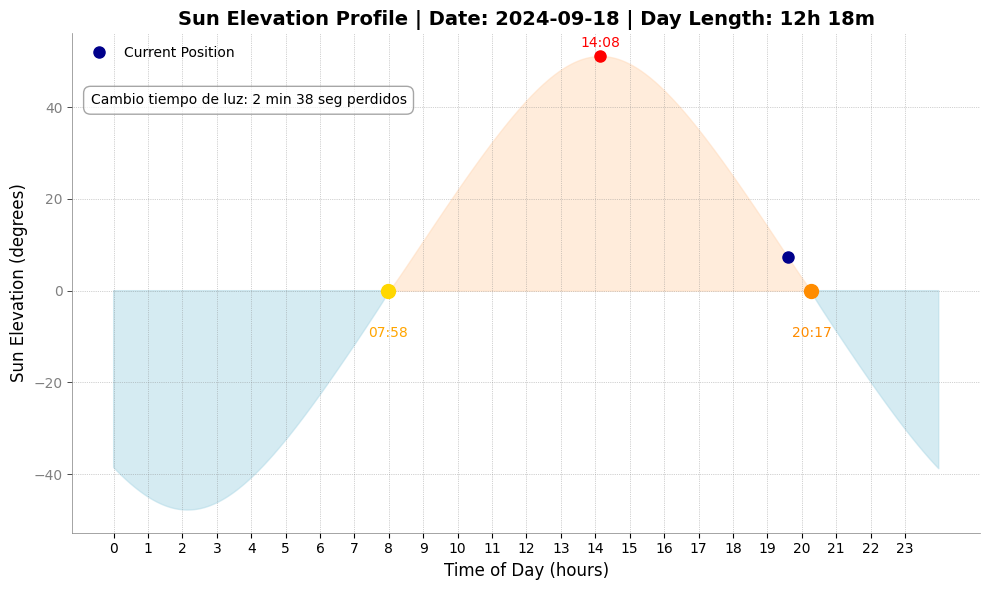

In [11]:
plot_sun_elevation(40.41144776110279, -3.6787949052050672, 'Europe/Madrid')

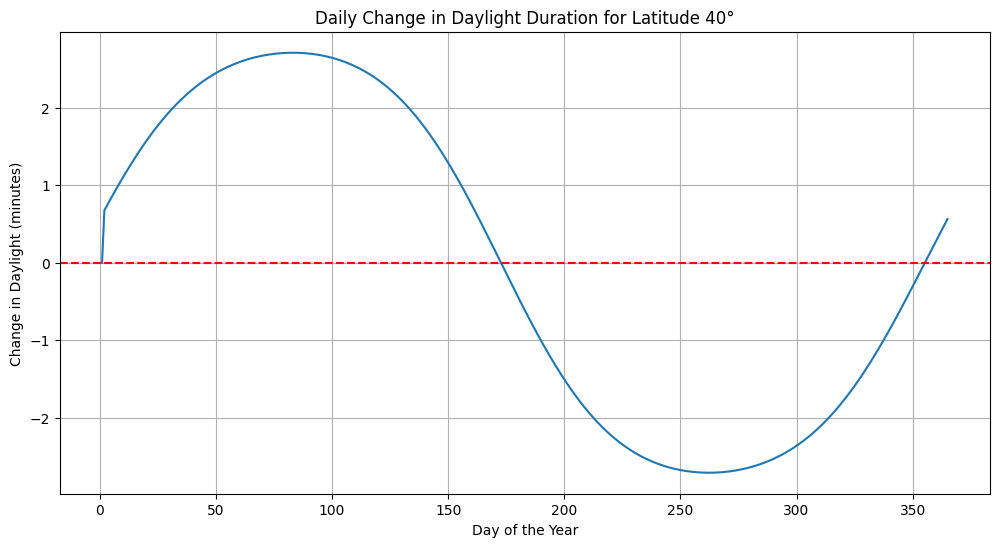

In [1]:
import math
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def calculate_daylight(date, latitude):
    # Convert latitude to radians
    lat_rad = math.radians(latitude)
    
    # Calculate day of year
    day_of_year = date.timetuple().tm_yday
    
    # Calculate solar declination
    declination = math.radians(23.45 * math.sin(math.radians((360 / 365) * (day_of_year - 81))))
    
    # Calculate day length in hours
    day_length = 24 - (24 / math.pi) * math.acos(
        min(max(
            (math.sin(math.radians(0.8333)) + math.sin(lat_rad) * math.sin(declination)) /
            (math.cos(lat_rad) * math.cos(declination)),
            -1
        ), 1)
    )
    
    return day_length

def generate_daylight_change_graph(year, latitude):
    if abs(latitude) > 90:
        raise ValueError("Latitude must be between -90 and 90 degrees.")
    
    start_date = datetime(year, 1, 1)
    days = []
    daylight_changes = []
    
    previous_daylight = calculate_daylight(start_date, latitude)
    
    for i in range(365):
        current_date = start_date + timedelta(days=i)
        current_daylight = calculate_daylight(current_date, latitude)
        
        daylight_change = current_daylight - previous_daylight
        
        days.append(i + 1)
        daylight_changes.append(daylight_change * 60)  # Convert to minutes
        
        previous_daylight = current_daylight
    
    plt.figure(figsize=(12, 6))
    plt.plot(days, daylight_changes)
    plt.title(f"Daily Change in Daylight Duration for Latitude {latitude}°")
    plt.xlabel("Day of the Year")
    plt.ylabel("Change in Daylight (minutes)")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

# Example usage
generate_daylight_change_graph(2024, 40)  # For latitude 40° North

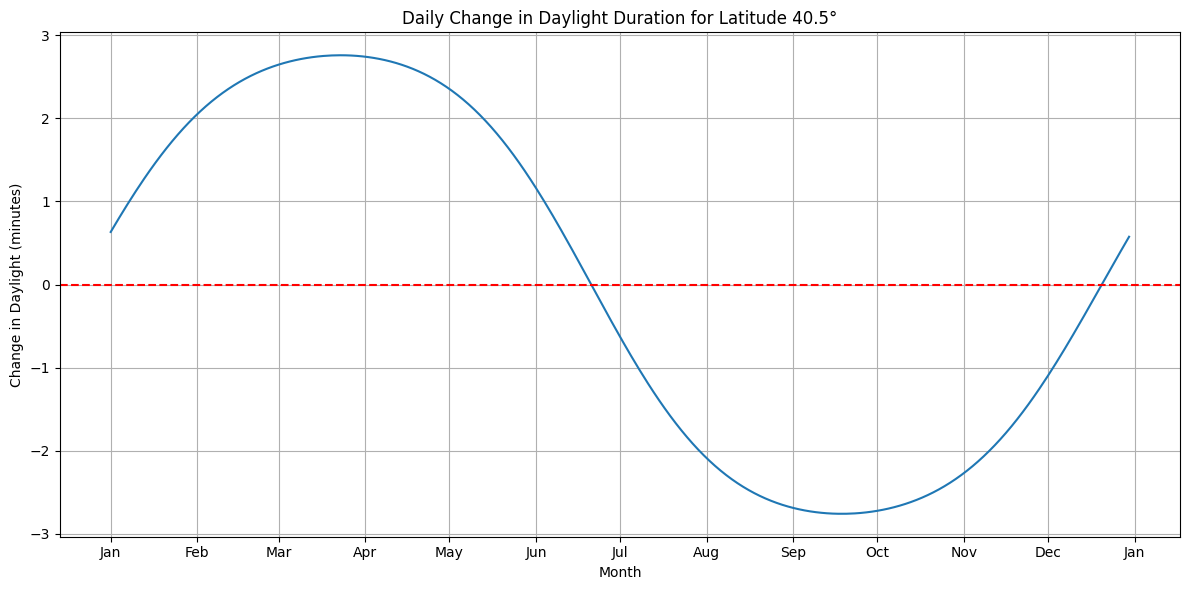

In [7]:
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

def calculate_daylight(date, latitude):
    lat_rad = math.radians(latitude)
    day_of_year = date.timetuple().tm_yday
    declination = math.radians(23.45 * math.sin(math.radians((360 / 365) * (day_of_year - 81))))
    day_length = 24 - (24 / math.pi) * math.acos(
        min(max(
            (math.sin(math.radians(0.8333)) + math.sin(lat_rad) * math.sin(declination)) /
            (math.cos(lat_rad) * math.cos(declination)),
            -1
        ), 1)
    )
    return day_length

def generate_daylight_change_graph(year, latitude):
    if abs(latitude) > 90:
        raise ValueError("Latitude must be between -90 and 90 degrees.")
    
    start_date = datetime(year, 1, 1)
    dates = []
    daylight_changes = []
    
    previous_daylight = calculate_daylight(start_date - timedelta(days=1), latitude)
    
    for i in range(365):
        current_date = start_date + timedelta(days=i)
        current_daylight = calculate_daylight(current_date, latitude)
        
        daylight_change = current_daylight - previous_daylight
        
        dates.append(current_date)
        daylight_changes.append(daylight_change * 60)  # Convert to minutes
        
        previous_daylight = current_daylight
    
    plt.figure(figsize=(12, 6))
    plt.plot(dates, daylight_changes)
    plt.title(f"Daily Change in Daylight Duration for Latitude {latitude}°")
    plt.xlabel("Month")
    plt.ylabel("Change in Daylight (minutes)")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)

    # Format x-axis to show months
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.tight_layout()
    plt.show()

# Example usage
generate_daylight_change_graph(2024, 40.5)  # For latitude 40° North

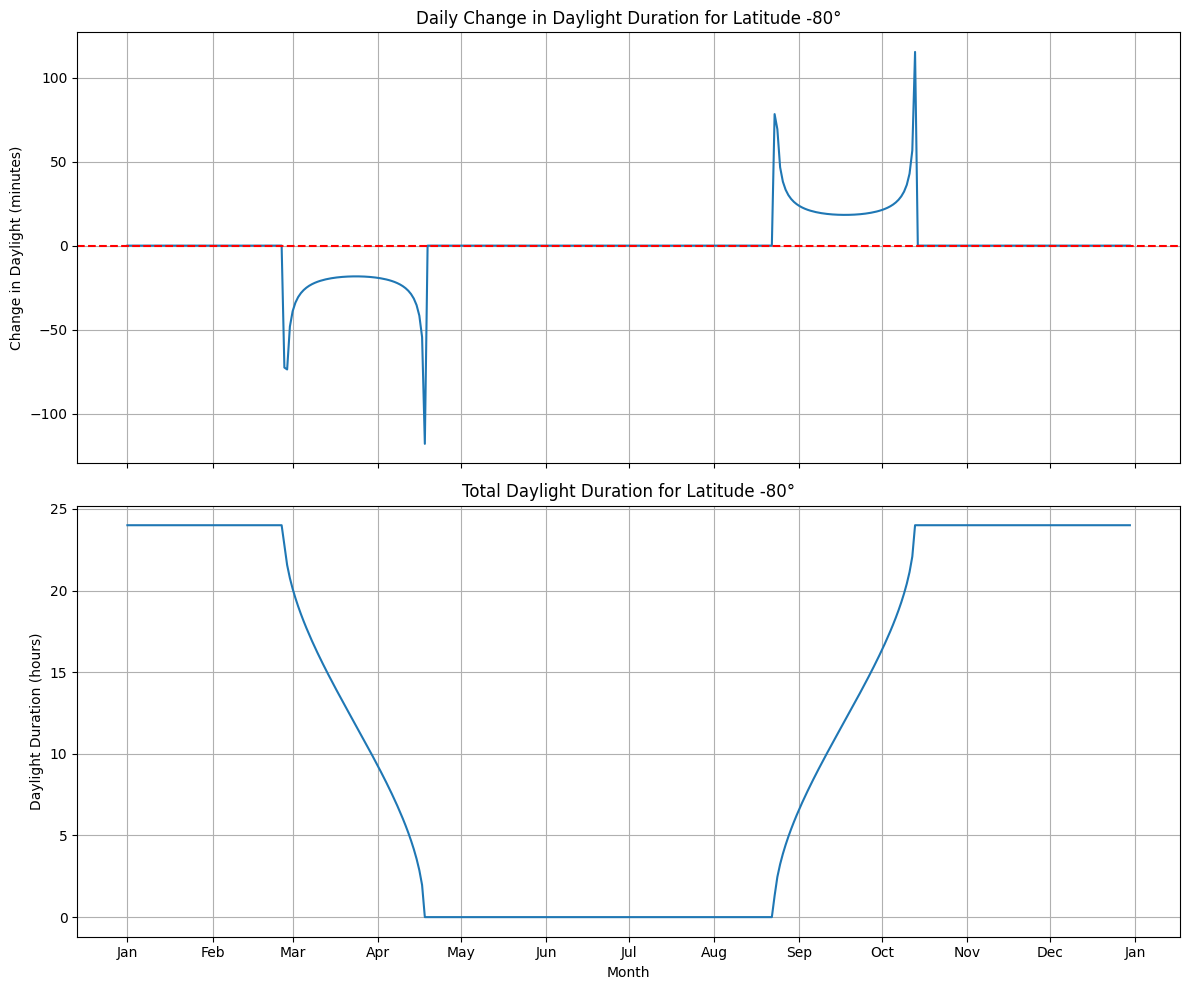

In [10]:
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

def calculate_daylight(date, latitude):
    lat_rad = math.radians(latitude)
    day_of_year = date.timetuple().tm_yday
    declination = math.radians(23.45 * math.sin(math.radians((360 / 365) * (day_of_year - 81))))
    day_length = 24 - (24 / math.pi) * math.acos(
        min(max(
            (math.sin(math.radians(0.8333)) + math.sin(lat_rad) * math.sin(declination)) /
            (math.cos(lat_rad) * math.cos(declination)),
            -1
        ), 1)
    )
    return day_length

def generate_daylight_graphs(year, latitude):
    if abs(latitude) > 90:
        raise ValueError("Latitude must be between -90 and 90 degrees.")
    
    start_date = datetime(year, 1, 1)
    dates = []
    daylight_changes = []
    daylight_amounts = []
    
    previous_daylight = calculate_daylight(start_date - timedelta(days=1), latitude)
    
    for i in range(365):
        current_date = start_date + timedelta(days=i)
        current_daylight = calculate_daylight(current_date, latitude)
        
        daylight_change = current_daylight - previous_daylight
        
        dates.append(current_date)
        daylight_changes.append(daylight_change * 60)  # Convert to minutes
        daylight_amounts.append(current_daylight)
        
        previous_daylight = current_daylight
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    # Plot daylight change
    ax1.plot(dates, daylight_changes)
    ax1.set_title(f"Daily Change in Daylight Duration for Latitude {latitude}°")
    ax1.set_ylabel("Change in Daylight (minutes)")
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.grid(True)

    # Plot total daylight
    ax2.plot(dates, daylight_amounts)
    ax2.set_title(f"Total Daylight Duration for Latitude {latitude}°")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Daylight Duration (hours)")
    ax2.grid(True)

    # Format x-axis to show months
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.tight_layout()
    plt.show()

# Example usage
generate_daylight_graphs(2024, -80)  # For latitude 40° North

C:\Users\Iván\AppData\Local\Temp\ipykernel_25592\778876269.py:50: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


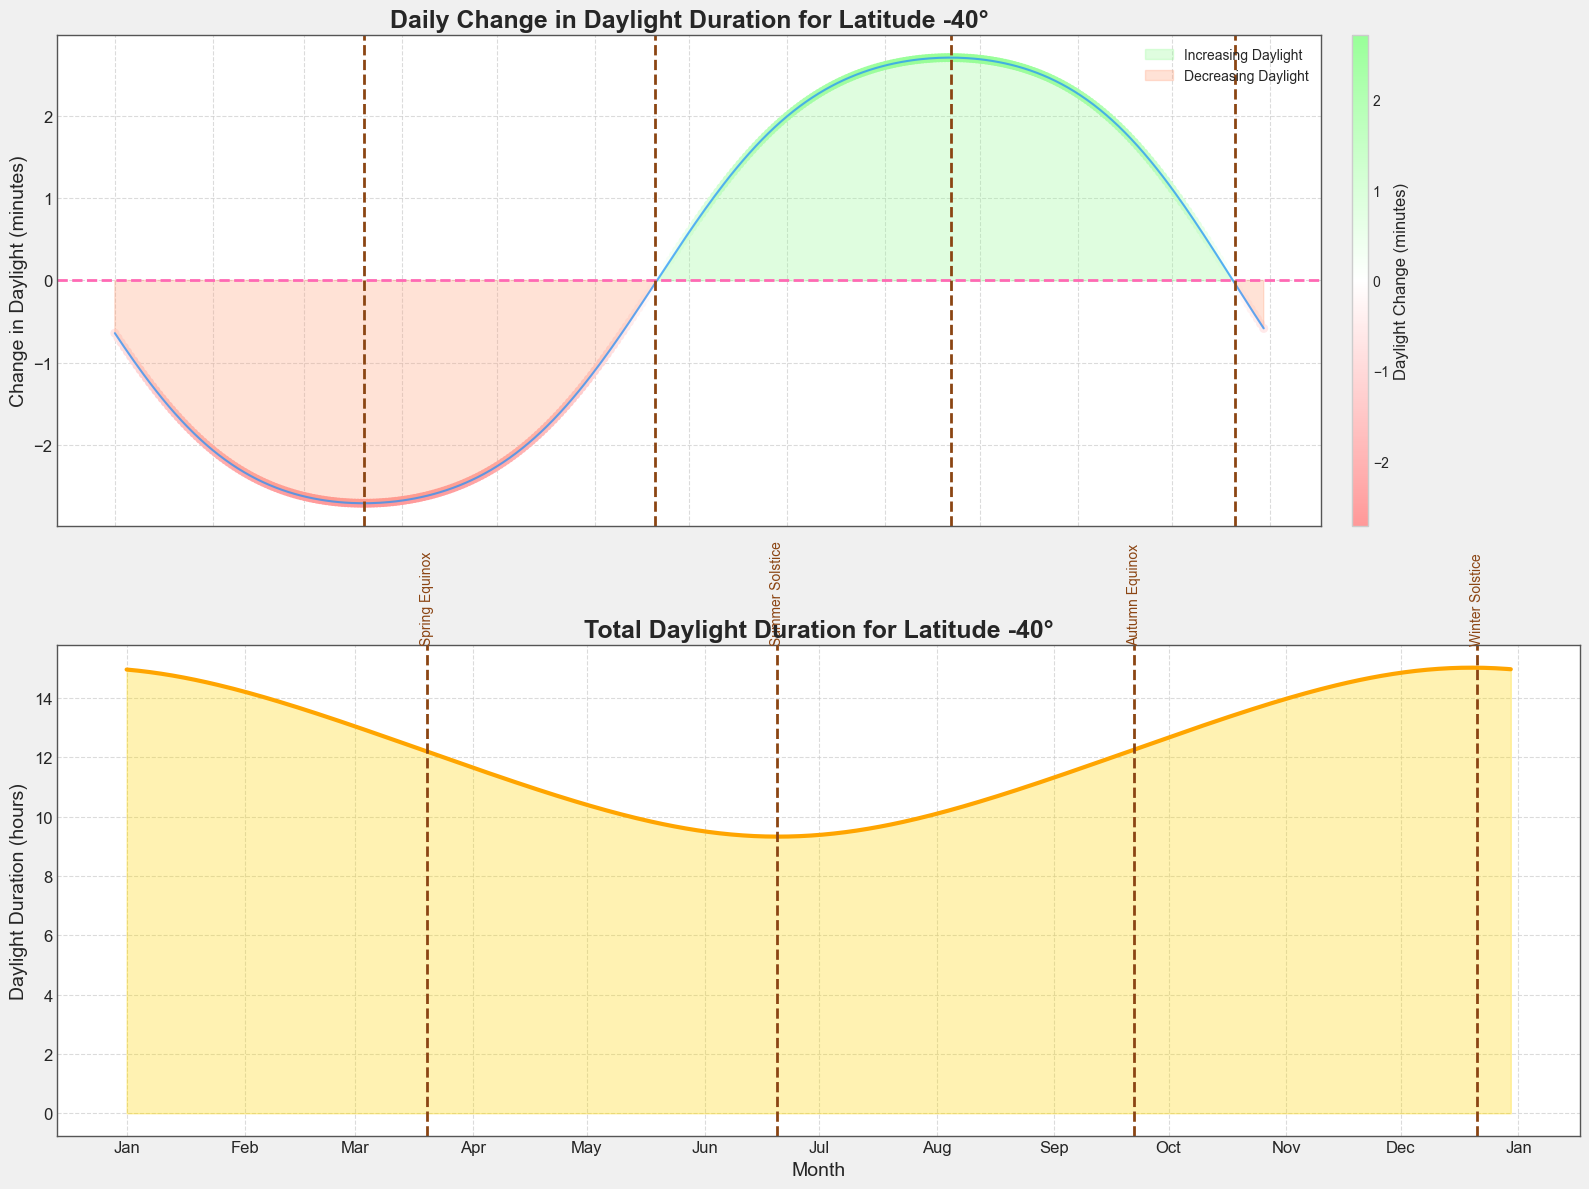

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from datetime import datetime, timedelta
from matplotlib.colors import LinearSegmentedColormap

def calculate_daylight(date, latitude):
    lat_rad = math.radians(latitude)
    day_of_year = date.timetuple().tm_yday
    declination = math.radians(23.45 * math.sin(math.radians((360 / 365) * (day_of_year - 81))))
    day_length = 24 - (24 / math.pi) * math.acos(
        min(max(
            (math.sin(math.radians(0.8333)) + math.sin(lat_rad) * math.sin(declination)) /
            (math.cos(lat_rad) * math.cos(declination)),
            -1
        ), 1)
    )
    return day_length

def generate_beautiful_daylight_graphs(year, latitude):
    if abs(latitude) > 90:
        raise ValueError("Latitude must be between -90 and 90 degrees.")
    
    start_date = datetime(year, 1, 1)
    dates = []
    daylight_changes = []
    daylight_amounts = []
    
    previous_daylight = calculate_daylight(start_date - timedelta(days=1), latitude)
    
    for i in range(365):
        current_date = start_date + timedelta(days=i)
        current_daylight = calculate_daylight(current_date, latitude)
        
        daylight_change = current_daylight - previous_daylight
        
        dates.append(current_date)
        daylight_changes.append(daylight_change * 60)  # Convert to minutes
        daylight_amounts.append(current_daylight)
        
        previous_daylight = current_daylight
    
    # Convert lists to numpy arrays
    daylight_changes = np.array(daylight_changes)
    daylight_amounts = np.array(daylight_amounts)
    
    # Set up the plot style
    plt.style.use('seaborn-whitegrid')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
    fig.patch.set_facecolor('#F0F0F0')
    
    # Custom color maps
    change_cmap = LinearSegmentedColormap.from_list("custom", ["#FF9999", "#FFFFFF", "#99FF99"])
    daylight_cmap = LinearSegmentedColormap.from_list("custom", ["#191970", "#4169E1", "#87CEEB", "#F0F8FF"])
    
    # Plot daylight change
    scatter = ax1.scatter(dates, daylight_changes, c=daylight_changes, cmap=change_cmap, s=30)
    ax1.plot(dates, daylight_changes, color='#1E90FF', alpha=0.7)
    ax1.set_title(f"Daily Change in Daylight Duration for Latitude {latitude}°", fontsize=18, fontweight='bold')
    ax1.set_ylabel("Change in Daylight (minutes)", fontsize=14)
    ax1.axhline(y=0, color='#FF69B4', linestyle='--', linewidth=2)
    ax1.fill_between(dates, daylight_changes, 0, where=(daylight_changes > 0), interpolate=True, color='#98FB98', alpha=0.3)
    ax1.fill_between(dates, daylight_changes, 0, where=(daylight_changes <= 0), interpolate=True, color='#FFA07A', alpha=0.3)
    
    # Plot total daylight
    ax2.plot(dates, daylight_amounts, color='#FFA500', linewidth=3)
    ax2.fill_between(dates, daylight_amounts, color='#FFD700', alpha=0.3)
    ax2.set_title(f"Total Daylight Duration for Latitude {latitude}°", fontsize=18, fontweight='bold')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("Daylight Duration (hours)", fontsize=14)
    
    # Customize the appearance
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        for spine in ax.spines.values():
            spine.set_edgecolor('#555555')
    
    # Add seasonal markers
    seasons = [
        ("Spring Equinox", datetime(year, 3, 20)),
        ("Summer Solstice", datetime(year, 6, 20)),
        ("Autumn Equinox", datetime(year, 9, 22)),
        ("Winter Solstice", datetime(year, 12, 21))
    ]
    
    for name, date in seasons:
        ax1.axvline(x=date, color='#8B4513', linestyle='--', linewidth=2)
        ax2.axvline(x=date, color='#8B4513', linestyle='--', linewidth=2)
        ax2.text(date, ax2.get_ylim()[1], name, ha='center', va='bottom', fontsize=10, rotation=90, color='#8B4513')
    
    # Add a color bar for the daylight change plot
    cbar = fig.colorbar(scatter, ax=ax1, pad=0.02, aspect=30)
    cbar.set_label('Daylight Change (minutes)', fontsize=12)
    
    # Add a legend for the daylight change plot
    increase_patch = mpatches.Patch(color='#98FB98', label='Increasing Daylight', alpha=0.3)
    decrease_patch = mpatches.Patch(color='#FFA07A', label='Decreasing Daylight', alpha=0.3)
    ax1.legend(handles=[increase_patch, decrease_patch], loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Example usage
generate_beautiful_daylight_graphs(2024, -40)  # For latitude 40° North

In [3]:
def get_arome_data(url):

#url = 'https://www.meteociel.fr/modeles/pe-arome_table.php?x=0&y=0&lat=40.41&lon=-3.658&run=9&mode=8&sort=0'  # Replace this with the URL containing the table

    url = url

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table element with class "gefs"
    table = soup.find('table', {'class': 'gefs'})

    # Get table rows
    rows = table.find_all('tr')

    # Extract headers from the first row
    headers = [header.get_text(strip=True) for header in rows[0].find_all('td')]

    # Extract data from the remaining rows
    data = []
    for row in rows[1:]:
        columns = row.find_all('td')
        row_data = [column.get_text(strip=True) for column in columns]
        data.append(row_data)

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=headers)
    df.index = pd.to_datetime(df["Date"])

    df.index = df.index.tz_convert('Europe/Madrid')
    df = df.drop("Date",axis=1)
    df = df.drop("Ech.",axis=1)
    df = df.astype("float")

    return df


def get_last_arome_run():

    runs = [3, 9, 15, 21]
    url ='https://www.meteociel.fr/modeles/pe-arome_table.php?x=0&y=0&lat=43.35&lon=-4.047&mode=8&sort=0'

    first_index = pd.Timestamp(year=2017, month=1, day=1,tz="UTC")

    for run in runs:
        url_run = f'{url}&run={run}'
        first_index_run = get_arome_data(url_run).index[0]

        if first_index_run > first_index:
            first_index = first_index_run
            valid_run = run
        else:
            pass

    return valid_run

aemet_horario = pd.read_csv("https://www.aemet.es/es/eltiempo/observacion/ultimosdatos_3195_datos-horarios.csv?k=mad&l=3195&datos=det&w=0&f=temperatura&x=h24" ,
                            encoding="latin-1",skiprows=2,parse_dates=True,index_col=0,dayfirst=True)
aemet_horario.index = aemet_horario.index.tz_localize('Europe/Madrid')



aemet_horario_acumulado = pd.read_excel("Histórico/Acumulado Madrid.xlsx",index_col=0)
aemet_horario_acumulado.index = aemet_horario_acumulado.index.tz_localize('Europe/Madrid')

aemet_horario_acumulado = pd.concat([aemet_horario_acumulado,aemet_horario])

aemet_horario_acumulado = aemet_horario_acumulado[~aemet_horario_acumulado.index.duplicated(keep='first')]

aemet_horario_acumulado = aemet_horario_acumulado.sort_index(ascending=False)

aemet_horario_acumulado.index = aemet_horario_acumulado.index.tz_localize(None)


valid_run = get_last_arome_run()

def get_temp_data(valid_run):

    url ='https://www.meteociel.fr/modeles/pe-arome_table.php?x=0&y=0&lat=40.41&lon=-3.659&mode=8&sort=0'
    url_run = f'{url}&run={valid_run}'

    temp_data = get_arome_data(url_run)

    return temp_data

def get_wind_gust_data(valid_run):

    url ='https://www.meteociel.fr/modeles/pe-arome_table.php?x=0&y=0&lat=40.41&lon=-3.659&mode=13&sort=0'
    url_run = f'{url}&run={valid_run}'

    wind_gust_data = get_arome_data(url_run)

    return wind_gust_data

def get_pressure_data(valid_run):

    url ='https://www.meteociel.fr/modeles/pe-arome_table.php?x=0&y=0&lat=40.41&lon=-3.659&mode=1&sort=0'
    url_run = f'{url}&run={valid_run}'

    pressure_data = get_arome_data(url_run)

    return pressure_data

def get_mucape_data(valid_run):

    url ='https://www.meteociel.fr/modeles/pe-arome_table.php?x=0&y=0&lat=40.41&lon=-3.659&mode=0&sort=0'
    url_run = f'{url}&run={valid_run}'

    mucape_data = get_arome_data(url_run)

    return mucape_data

def get_prec_data(valid_run):

    url ='https://www.meteociel.fr/modeles/pe-arome_table.php?x=0&y=0&lat=40.41&lon=-3.659&mode=10&sort=0'
    url_run = f'{url}&run={valid_run}'

    prec_data = get_arome_data(url_run)

    return prec_data

#####################################################

datos_df_global = pd.read_csv("retiro 1950.csv",index_col="fecha",parse_dates=True)

datos_df_global = datos_df_global[~((datos_df_global.index.month == 2) & (datos_df_global.index.day == 29) & datos_df_global.index.is_leap_year)]

datos_df_global['día_del_año'] = datos_df_global.index.day_of_year

es_bisiesto = datos_df_global.index.year % 4 == 0
es_bisiesto &= (datos_df_global.index.year % 100 != 0) | (datos_df_global.index.year % 400 == 0)
marzo_en_adelante = datos_df_global.index.month >= 3
datos_df_global.loc[es_bisiesto & marzo_en_adelante, 'día_del_año'] -= 1

temp_medias = datos_df_global[["día_del_año","tmed","tmax","tmin"]]
temp_medias = temp_medias.dropna(how="any")

temp_medias_rolling = temp_medias[["tmed","tmax","tmin"]].rolling(15,center=True).mean().dropna()
temp_medias_rolling["día del año"] = temp_medias_rolling.index.day_of_year

es_bisiesto = temp_medias_rolling.index.year % 4 == 0
es_bisiesto &= (temp_medias_rolling.index.year % 100 != 0) | (temp_medias_rolling.index.year % 400 == 0)
marzo_en_adelante = temp_medias_rolling.index.month >= 3
temp_medias_rolling.loc[es_bisiesto & marzo_en_adelante, 'día del año'] -= 1

temp_medias_rolling = temp_medias_rolling.groupby("día del año").quantile([0.15, 0.85]).unstack()

#####################################################

año_max_maxima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmax"].idxmax().year
año_min_maxima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmin"].idxmax().year

año_min_minima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmin"].idxmin().year
año_max_minima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmax"].idxmin().year

max_maxima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmax"].max()
min_maxima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmin"].max()

min_minima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmin"].min()
max_minima = datos_df_global[datos_df_global["día_del_año"]==int(datetime.today().strftime("%j"))]["tmax"].min()

records_dia = pd.DataFrame(columns=["T. max","T. min"],index=["Record calor","Record frío"])
records_dia["T. max"] = ["{} ({})".format(max_maxima, año_max_maxima),"{} ({})".format(max_minima, año_max_minima)]
records_dia["T. min"] = ["{} ({})".format(min_maxima, año_min_maxima),"{} ({})".format(min_minima, año_min_minima)]
records_dia = records_dia.style.apply(lambda x: ['background-color: rgba(255, 204, 204, 0.4)' if x.name == 'T. max' else 'background-color: rgba(204, 204, 255, 0.4)' for i in x], 
                        axis=0, subset=pd.IndexSlice[:, ['T. max', 'T. min']])


#st.write(aemet_horario.index[0].strftime("%A %d %B %H:%M: "),str(aemet_horario["Temperatura (ºC)"].iloc[0])+"º")

     

st.sidebar.subheader("Previsión más reciente: "+str(valid_run+2)+" horas")

st.sidebar.subheader("Datos más recientes: "+str(aemet_horario.index[0].hour)+" horas")



temp_data = get_temp_data(valid_run)
temp_data["Actual data"] = aemet_horario["Temperatura (ºC)"]

temp_actual = aemet_horario["Temperatura (ºC)"].iloc[0]
temp_ayer = aemet_horario.iloc[-1]["Temperatura (ºC)"]

dia_mañana = (datetime.now() + timedelta(hours=26)).day
hora = (datetime.now() + timedelta(hours=2)).hour

temp_mañana = temp_data.loc[temp_data.index[(temp_data.index.hour==hora) & (temp_data.index.day ==dia_mañana)]].mean(axis=1)[0].round(1)
desv_temp = temp_data.loc[temp_data.index[(temp_data.index.hour==hora) & (temp_data.index.day ==dia_mañana)]].std(axis=1).round(1)[0]

fiabilidad = 10*np.exp(-0.05*desv_temp**2.5)


########################################################

día_año_hoy = (datetime.now()+timedelta(hours=2)).timetuple().tm_yday

día_año_mañana = día_año_hoy + 1 #(datetime.now()+timedelta(hours=0)).timetuple().tm_yday

hora_día = (datetime.now()+timedelta(hours=2)).hour



# Definir el array de valores
arr_max = datos_df_global[datos_df_global["día_del_año"]==día_año_hoy]["tmax"].sort_values().dropna()

# Definir el valor para el cual deseas calcular el percentil
valor_max = temp_data[temp_data.index.day_of_year==día_año_hoy].mean(axis=1).max().round(1)


# Definir el array de valores
arr_min = datos_df_global[datos_df_global["día_del_año"]==día_año_hoy]["tmin"].sort_values().dropna()

# Definir el valor para el cual deseas calcular el percentil
valor_min = temp_data[temp_data.index.day_of_year==día_año_hoy].mean(axis=1).min().round(1)

# Calcular el percentil

percentil_max_hoy = percentileofscore(arr_max, valor_max)

percentil_min_hoy = percentileofscore(arr_min, valor_min)



# Definir el array de valores
arr_max = datos_df_global[datos_df_global["día_del_año"]==día_año_mañana]["tmax"].sort_values().dropna()

# Definir el valor para el cual deseas calcular el percentil
valor_max_mañana = temp_data[temp_data.index.day_of_year==día_año_mañana].mean(axis=1).max().round(1)


# Definir el array de valores
arr_min = datos_df_global[datos_df_global["día_del_año"]==día_año_mañana]["tmin"].sort_values().dropna()

# Definir el valor para el cual deseas calcular el percentil
valor_min_mañana = temp_data[temp_data.index.day_of_year==día_año_mañana].mean(axis=1).min().round(1)

# Calcular el percentil

percentil_max_mañana = percentileofscore(arr_max, valor_max_mañana)

percentil_min_mañana = percentileofscore(arr_min, valor_min_mañana)

2024-09-20 20:45:05.447 
  command:

    streamlit run C:\Users\Iván\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [4]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

c:\Users\Iván\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
genai.GenerativeModel()

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [18]:
import google.generativeai as genai

genai.configure(api_key="AIfff7bECe59g")

In [19]:
model = genai.GenerativeModel(('gemini-1.5-pro-exp-0827'))

In [20]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: total: 0 ns
Wall time: 9.48 s


In [21]:
response.text

"The meaning of life is a question that has been pondered by philosophers, theologians, and individuals for centuries. There is no single, universally accepted answer, as meaning is often a personal and subjective experience. \n\nHere are some perspectives on the meaning of life:\n\n**Philosophical Perspectives:**\n\n* **Nihilism:**  Life has no inherent meaning or purpose.\n* **Existentialism:** We are free to create our own meaning and purpose.\n* **Absurdism:** The search for meaning in a meaningless universe is inherently absurd, but we should embrace the absurdity.\n* **Hedonism:** The pursuit of pleasure and avoidance of pain is the ultimate goal.\n* **Stoicism:**  Finding meaning through virtue, reason, and acceptance of what we cannot control.\n\n**Religious Perspectives:**\n\n* Many religions offer answers to the meaning of life, often involving a relationship with a divine being, fulfilling a divine purpose, or achieving enlightenment or salvation.\n\n**Scientific Perspective

In [27]:
import json

temp_data = get_temp_data(valid_run)
wind_gust_data = get_wind_gust_data(valid_run)
pressure_data = get_pressure_data(valid_run)
mucape_data = get_mucape_data(valid_run)
prec_data = get_prec_data(valid_run)


def process_multi_model_dataframe(df):
    """Process a dataframe with timestamp index and 17 forecast columns."""
    processed_data = []
    for timestamp, row in df.iterrows():
        forecasts = row.tolist()
        processed_data.append({
            'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),  # Convert timestamp to string
            'forecasts': forecasts
        })
    return processed_data


weather_data = {
    'temperature': process_multi_model_dataframe(temp_data),
    'wind': process_multi_model_dataframe(wind_gust_data),
    'precipitation': process_multi_model_dataframe(prec_data),
    'pressure': process_multi_model_dataframe(prec_data),
    'mucape': process_multi_model_dataframe(mucape_data)
}


weather_json = json.dumps(weather_data)



def generate_llm_input(weather_json):
    # Load the meteorological data
    meteo_data = weather_json

    # Define the prompt
    prompt = """# Meteorological Data Analysis Prompt

You are a professional meteorologist tasked with analyzing and commenting on weather forecast data for the next 48 hours. The data provided includes hourly information on temperature, wind, precipitation, pressure, and MUCAPE (Most Unstable Convective Available Potential Energy).

## Data Analysis Tasks:

1. Summarize the overall weather pattern for the 48-hour period.

2. Identify and report on key data points:
   - Temperature: Highlight daily highs and lows, and any significant temperature changes.
   - Wind: Report on average wind speeds, signalling hazardous values.
   - Precipitation: Summarize total expected precipitation and identify periods of heaviest rainfall.
   - Pressure: Note any significant pressure changes that might indicate approaching weather systems.
   - MUCAPE: Interpret MUCAPE values to assess the potential for thunderstorm development.

3. Model Alignment:
   - Analyze the consistency of the data across different weather models.
   - Highlight any significant discrepancies between models and explain their potential implications.

4. Risk Assessment:
   - Identify any potential weather risks or hazards, such as:
     - Extreme temperatures (heat waves or cold snaps)
     - Strong winds or wind gusts
     - Heavy precipitation leading to flooding risks
     - Severe thunderstorm potential based on MUCAPE values and other factors
   - Provide a severity rating for each identified risk (e.g., low, moderate, high, extreme).

5. Special Weather Phenomena:
   - Note any unusual or noteworthy weather patterns or events that may occur during this period.

## Output Format:

1. Executive Summary (2-3 sentences overview)
2. Detailed Analysis (broken down by weather component)
3. Model Comparison and Uncertainty Discussion
4. Risk Assessment and Warnings
5. Concluding Remarks and Forecast Confidence

Please provide your analysis in clear, concise language suitable for both meteorological professionals and informed members of the public. Use meteorological terminology where appropriate, but explain complex concepts when necessary.

## Meteorological Data:
"""

    # Combine the prompt and the data
    combined_input = f"{prompt}\n\n{json.dumps(meteo_data, indent=2)}"

    return combined_input


llm_input = generate_llm_input(weather_json)
print(llm_input)  # This is the string you would feed to your LLM

# Meteorological Data Analysis Prompt

You are a professional meteorologist tasked with analyzing and commenting on weather forecast data for the next 48 hours. The data provided includes hourly information on temperature, wind, precipitation, pressure, and MUCAPE (Most Unstable Convective Available Potential Energy).

## Data Analysis Tasks:

1. Summarize the overall weather pattern for the 48-hour period.

2. Identify and report on key data points:
   - Temperature: Highlight daily highs and lows, and any significant temperature changes.
   - Wind: Report on average wind speeds, signalling hazardous values.
   - Precipitation: Summarize total expected precipitation and identify periods of heaviest rainfall.
   - Pressure: Note any significant pressure changes that might indicate approaching weather systems.
   - MUCAPE: Interpret MUCAPE values to assess the potential for thunderstorm development.

3. Model Alignment:
   - Analyze the consistency of the data across different weather m

In [28]:
%%time
prompt = generate_llm_input(weather_json)
response = model.generate_content(prompt)

CPU times: total: 0 ns
Wall time: 17.9 s


In [29]:
from IPython.display import Markdown, display

def display_forecast_markdown(forecast):
    # Add a title and wrap the forecast in a Markdown code block
    markdown_content = f"""
# Weather Forecast

```
{forecast}
```
    """
    
    # Display the Markdown
    display(Markdown(markdown_content))

# Assuming 'forecast' is your generated forecast string
display_forecast_markdown(response.text)


# Weather Forecast

```
## 48-Hour Weather Forecast Analysis: August 28-30, 2024

**Executive Summary:** The next 48 hours are expected to be marked by a significant warm spell with potentially hazardous wind gusts and a risk of thunderstorms, primarily on August 29th.  The models show some variability, particularly with wind speeds and the timing of precipitation.

**Detailed Analysis:**

* **Temperature:**  Temperatures will rise steadily throughout the forecast period, reaching highs in the mid-30s Celsius (°C) on August 28th and exceeding 35°C on August 29th.  A slight cooling trend is expected on August 30th, but daytime temperatures will still remain above average, reaching the low 20s °C.  Nighttime lows will be mild, ranging from the mid-20s to low 20s °C.
* **Wind:**  Winds will generally be moderate, averaging between 15 and 25 kilometers per hour (km/h).  However, there is a significant risk of hazardous wind gusts, particularly on August 29th, with some models predicting gusts exceeding 40 km/h.  This elevated wind risk warrants attention, especially for those engaged in outdoor activities or living in areas prone to wind damage.
* **Precipitation:** The forecast predicts a relatively dry period with scattered light precipitation. The heaviest rainfall is expected on August 29th, primarily in the afternoon and evening, with accumulations reaching up to 10 millimeters (mm).  There is a slight chance of a few more showers on August 30th, but overall rainfall will be minimal.
* **Pressure:** A gradual decrease in pressure is expected throughout the 48-hour period, potentially indicating the approach of a weather system. This may lead to more dynamic conditions and increased instability, particularly on August 29th.
* **MUCAPE:**  MUCAPE values will remain relatively low for most of the forecast period, indicating limited potential for thunderstorm development. However, there is a notable increase in MUCAPE values on August 29th, reaching above 1000 Joules per kilogram (J/kg) in some areas, which suggests a moderate risk of thunderstorms with potential for heavy rainfall and gusty winds.

**Model Comparison and Uncertainty Discussion:**

The different weather models show some discrepancies, particularly with wind speeds and the timing of precipitation. Some models predict stronger wind gusts than others, particularly on August 29th, highlighting the need for vigilance.  The timing and intensity of precipitation are also subject to some variation between the models.  This variability suggests a need for continued monitoring and potential adjustments to the forecast as new data becomes available.

**Risk Assessment and Warnings:**

* **Extreme Temperatures:**  Moderate risk of heat wave conditions on August 29th, with daytime temperatures exceeding 35°C.
* **Strong Winds:** Moderate risk of strong wind gusts on August 29th, potentially exceeding 40 km/h. This could lead to damage to property, trees, and powerlines.
* **Heavy Precipitation:**  Moderate risk of localized heavy rainfall on August 29th, with potential for minor flooding in areas with poor drainage.
* **Thunderstorm Potential:** Moderate risk of thunderstorms on August 29th, with potential for heavy rainfall, gusty winds, and even hail in localized areas.

**Concluding Remarks and Forecast Confidence:**

The forecast predicts a significant warm spell with potential for hazardous wind gusts and thunderstorms, primarily on August 29th. The models show some variability, particularly with wind speeds and precipitation, suggesting a need for continued monitoring. While the overall confidence in the forecast is moderate, the possibility of stronger wind gusts and thunderstorms warrants caution and attention to local weather updates. 

```
    

In [ ]:
weather_data = {
    'temperature': process_multi_model_dataframe(temp_data),
    'wind': process_multi_model_dataframe(wind_gust_data),
    'precipitation': process_multi_model_dataframe(prec_data),
    'pressure': process_multi_model_dataframe(prec_data),
    'mucape': process_multi_model_dataframe(mucape_data)
}

weather_data.keys()

dict_keys(['temperature', 'wind', 'precipitation', 'pressure', 'mucape'])

In [ ]:
prompt = f"I have several dataframes with meteo data: 'temperature', 'wind', 'precipitation', 'pressure', 'mucape'. \
    i want to develop a comprehensive, detailed python function to generate a professional written forecast \
    for meteo context, take that the data is for Madrid. Consider that each dataframe has 17 different forecasts,\
    take into account all of them and specially the discrepancies betwwen them. pay attention to possible extreme weather \
    like heavy rains, temperatures, winds, or risk of storms. here you have the data: {weather_json} "

In [ ]:
prompt

'I have several dataframes with meteo data: \'temperature\', \'wind\', \'precipitation\', \'pressure\', \'mucape\'.     i want to develop a comprehensive, detailed python function to generate a professional written forecast     for meteo context, take that the data is for Madrid. Consider that each dataframe has 17 different forecasts,    take into account all of them and specially the discrepancies betwwen them. pay attention to possible extreme weather     like heavy rains, temperatures, winds, or risk of storms. here you have the data: {"temperature": [{"timestamp": "2024-08-24 11:00:00", "forecasts": [26.0, 25.9, 26.2, 26.1, 25.8, 26.3, 26.2, 26.2, 26.0, 26.1, 25.8, 25.9, 26.0, 26.0, 25.9, 26.3, 26.1]}, {"timestamp": "2024-08-24 12:00:00", "forecasts": [28.2, 27.4, 27.2, 28.2, 27.2, 28.8, 27.7, 28.7, 28.0, 28.4, 25.8, 27.8, 27.7, 26.8, 28.0, 27.9, 26.6]}, {"timestamp": "2024-08-24 13:00:00", "forecasts": [30.2, 29.2, 29.6, 30.0, 27.5, 30.9, 30.1, 30.3, 30.2, 29.6, 28.6, 28.4, 30.0,


# Weather Forecast

```
**August 28th:**

**Summary:**  Today will be hot with a slight chance of isolated, brief showers and thunderstorms, mainly in the evening, with a possibility of strong winds.


*   **Temperature:** Expect a hot day with temperatures reaching a high near 36°C.
*   **Precipitation:** There is a 10-20% chance of light showers or isolated thunderstorms developing after 18:00, potentially lasting into the early evening.
*   **Wind:** Strong winds are possible, with gusts potentially exceeding 30 km/h, particularly in the late afternoon and early evening.  
*   **Storms:** There is a low risk of thunderstorms, mostly after 18:00, with the potential for gusty winds being the primary concern.


**August 29th:**

**Summary:**  Expect a chance of showers and thunderstorms throughout the day, with the greatest risk during the late afternoon and evening.  Conditions are favorable for stronger storms with high wind gusts and potentially heavy rainfall.

*   **Temperature:**  Temperatures will be more moderate than yesterday, with highs expected in the low 20s °C. 
*   **Precipitation:** There's a 60-70% chance of showers and thunderstorms throughout the day, with the highest probability (80-90%) of moderate to heavy showers/thunderstorms after 17:00. 
*   **Wind:** Strong winds are likely, with gusts possibly exceeding 30 km/h, particularly during any thunderstorms. There is a risk of damaging wind gusts associated with any stronger storms.
*   **Storms:** There is a moderate to high risk of thunderstorms, particularly in the late afternoon and evening, due to high MUCAPE values and atmospheric instability. There is a possibility of severe weather, including heavy rain, strong wind gusts, and potentially hail.

```
    

In [19]:
import pandas as pd
from datetime import datetime, timedelta

def generate_ensemble_weather_story(temp_data, wind_gust_data, pressure_data, mucape_data, prec_data):
    today = pd.Timestamp.now(tz='Europe/Madrid').floor('D')
    tomorrow = today + timedelta(days=1)
    
    def get_day_data(df, day):
        return df[df.index.date == day.date()]
    
    def describe_temperature_pattern(temp_df):
        ctrl_temp = temp_df['Ctrl']
        ensemble_temps = temp_df.iloc[:, 1:]
        
        max_temp = ctrl_temp.max()
        min_temp = ctrl_temp.min()
        max_temp_time = ctrl_temp.idxmax().strftime('%H:%M')
        
        ensemble_max = ensemble_temps.max().max()
        ensemble_min = ensemble_temps.min().min()
        
        temp_range = max_temp - min_temp
        ensemble_range = ensemble_max - ensemble_min
        
        story = f"The control forecast suggests temperatures will range from {min_temp:.1f}°C to {max_temp:.1f}°C, peaking around {max_temp_time}. "
        
        if ensemble_range > temp_range + 5:
            story += f"However, some models show a wider range of {ensemble_min:.1f}°C to {ensemble_max:.1f}°C, indicating uncertainty in the forecast. "
        
        if temp_range < 5:
            story += "Overall, we're looking at a day of stable temperatures. "
        elif temp_range < 10:
            story += "Expect a mild day with noticeable but not extreme temperature changes. "
        else:
            story += "Prepare for significant temperature swings throughout the day. "
        
        return story

    def describe_wind_conditions(wind_df):
        ctrl_wind = wind_df['Ctrl']
        ensemble_winds = wind_df.iloc[:, 1:]
        
        max_wind = ctrl_wind.max()
        avg_wind = ctrl_wind.mean()
        max_wind_time = ctrl_wind.idxmax().strftime('%H:%M')
        
        ensemble_max = ensemble_winds.max().max()
        
        story = f"The primary forecast shows wind gusts peaking at {max_wind:.1f} km/h around {max_wind_time}. "
        
        if ensemble_max > max_wind + 10:
            story += f"Some models suggest gusts could reach as high as {ensemble_max:.1f} km/h. "
        
        if max_wind < 20:
            story += "Overall, expect gentle breezes throughout most of the day. "
        elif max_wind < 40:
            story += "Be prepared for some lively winds that might rustle leaves and affect loose objects. "
        else:
            story += "It's going to be a blustery day! Secure any loose items outdoors. "
        
        return story

    def describe_pressure_trend(pressure_df):
        ctrl_pressure = pressure_df['Ctrl']
        ensemble_pressures = pressure_df.iloc[:, 1:]
        
        start_pressure = ctrl_pressure.iloc[0]
        end_pressure = ctrl_pressure.iloc[-1]
        pressure_change = end_pressure - start_pressure
        
        ensemble_change = ensemble_pressures.iloc[-1] - ensemble_pressures.iloc[0]
        max_change = ensemble_change.max()
        min_change = ensemble_change.min()
        
        story = f"Barometric pressure is expected to {'rise' if pressure_change > 0 else 'fall'} by about {abs(pressure_change):.1f} hPa over the day."
        
        if abs(max_change - min_change) > 2:
            story += "However, there's some disagreement between models on the extent of this change. "
        
        if abs(pressure_change) < 2:
            story += "This suggests relatively stable weather conditions. "
        elif pressure_change > 0:
            story += "Rising pressure often indicates improving weather. "
        else:
            story += "Falling pressure might bring some changes, possibly unsettled conditions. "
        
        return story

    def describe_thunderstorm_potential(mucape_df):
        ctrl_mucape = mucape_df['Ctrl']
        ensemble_mucape = mucape_df.iloc[:, 1:]
        
        max_mucape = ctrl_mucape.max()
        max_mucape_time = ctrl_mucape.idxmax().strftime('%H:%M')
        
        ensemble_max = ensemble_mucape.max().max()
        
        story = f"The control forecast shows a peak MUCAPE value of {max_mucape:.0f} J/kg around {max_mucape_time}. "
        
        if ensemble_max > max_mucape + 500:
            story += f"Some models suggest it could reach as high as {ensemble_max:.0f} J/kg. "
        
        if max_mucape < 500:
            story += "The atmosphere appears stable, with clear skies likely to dominate. "
        elif max_mucape < 1000:
            story += "There's a slight chance of some dramatic clouds forming, but thunderstorms are unlikely. "
        elif max_mucape < 2000:
            story += "Keep an ear out for thunder - there's potential for some storms to develop. "
        else:
            story += "The ingredients are there for some impressive thunderstorms. Keep an eye on the sky! "
        
        return story

    def describe_precipitation(prec_df):
        ctrl_prec = prec_df['Ctrl']
        ensemble_prec = prec_df.iloc[:, 1:]
        
        total_prec = ctrl_prec.sum()
        max_hourly_prec = ctrl_prec.max()
        max_prec_time = ctrl_prec.idxmax().strftime('%H:%M')
        
        ensemble_total = ensemble_prec.sum()
        max_ensemble_total = ensemble_total.max()
        
        story = f"The main forecast predicts a total of {total_prec:.1f}mm of rain, with the heaviest period around {max_prec_time}. "
        
        if max_ensemble_total > total_prec + 5:
            story += f"However, some models suggest we could see up to {max_ensemble_total:.1f}mm. "
        
        if total_prec == 0:
            story += "It looks like it's going to be a dry day in Madrid. "
        elif total_prec < 5:
            story += "You might want to pack a light umbrella - we could see some sprinkles throughout the day. "
        elif max_hourly_prec > 10:
            story += f"Prepare for a good soaking! Heavy rain is expected, particularly around {max_prec_time}. "
        else:
            story += "Expect some wet weather spread throughout the day. "
        
        prob_rain = (ensemble_prec.sum() > 0.1).mean() * 100
        story += f"The probability of measurable rain is about {prob_rain:.0f}%. "
        
        return story

    story = []
    for day, day_name in [(today, "Today"), (tomorrow, "Tomorrow")]:
        day_temp = get_day_data(temp_data, day)
        day_wind = get_day_data(wind_gust_data, day)
        day_pressure = get_day_data(pressure_data, day)
        day_mucape = get_day_data(mucape_data, day)
        day_prec = get_day_data(prec_data, day)
        
        day_story = f"Weather Story for Madrid - {day_name}, {day.strftime('%B %d')}:\n\n"
        day_story += describe_temperature_pattern(day_temp) + "\n\n"
        day_story += describe_wind_conditions(day_wind) + "\n\n"
        day_story += describe_pressure_trend(day_pressure) + "\n\n"
        day_story += describe_thunderstorm_potential(day_mucape) + "\n\n"
        day_story += describe_precipitation(day_prec) + "\n\n"
        
        # Add a summary of the day's weather
        day_story += "In summary: "
        if day_prec['Ctrl'].sum() > 5:
            day_story += "A wet day with periods of rain. "
        elif day_wind['Ctrl'].max() > 40:
            day_story += "A windy day with strong gusts. "
        elif day_temp['Ctrl'].max() - day_temp['Ctrl'].min() > 15:
            day_story += "A day of significant temperature changes. "
        else:
            day_story += "A relatively stable day weather-wise. "
        
        if day_mucape['Ctrl'].max() > 1500:
            day_story += "Keep an eye out for potential thunderstorms."
        
        story.append(day_story)
    
    return "\n\n".join(story)


temp_data = get_temp_data(valid_run)
wind_gust_data = get_wind_gust_data(valid_run)
pressure_data = get_pressure_data(valid_run)
mucape_data = get_mucape_data(valid_run)
prec_data = get_prec_data(valid_run)

commentary = generate_ensemble_weather_story(temp_data, wind_gust_data, pressure_data, mucape_data, prec_data)
print(commentary)

Weather Story for Madrid - Today, August 28:

The control forecast suggests temperatures will range from 26.4°C to 36.3°C, peaking around 18:00. Expect a mild day with noticeable but not extreme temperature changes. 

The primary forecast shows wind gusts peaking at 59.0 km/h around 23:00. Some models suggest gusts could reach as high as 77.0 km/h. It's going to be a blustery day! Secure any loose items outdoors. 

Barometric pressure is expected to fall by about 3.0 hPa over the day.However, there's some disagreement between models on the extent of this change. Falling pressure might bring some changes, possibly unsettled conditions. 

The control forecast shows a peak MUCAPE value of 752 J/kg around 19:00. Some models suggest it could reach as high as 1308 J/kg. There's a slight chance of some dramatic clouds forming, but thunderstorms are unlikely. 

The main forecast predicts a total of 0.0mm of rain, with the heaviest period around 12:00. It looks like it's going to be a dry day i

In [ ]:

prec_data

,Ctrl,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Date,,,,,,,,,,,,,,,,,
2024-06-30 12:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30 13:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0
2024-06-30 14:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30 15:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30 16:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30 17:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30 18:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30 19:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30 20:00:00+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='fecha'>

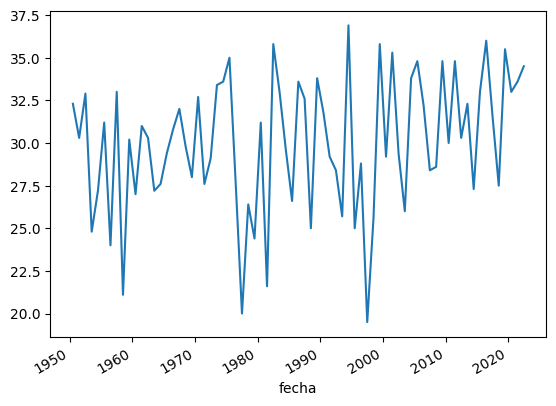

In [ ]:
arr_max.sort_index().plot()

In [ ]:
rain_chance

NameError: name 'rain_chance' is not defined

In [ ]:
rain_chance = get_prec_data(valid_run)

rain_chance = rain_chance.loc[rain_chance.index.dayofyear==día_año_hoy]

rain_chance = 100 * pd.DataFrame((rain_chance.apply(lambda row: sum(row != 0), axis=1) / len(rain_chance.columns)) )

rain_chance = rain_chance[rain_chance > 20].dropna().index.hour

if len(rain_chance) > 0:
    hours_list = list(map(str, rain_chance))
    if len(hours_list) > 1:
        hours_str = ", ".join(hours_list[:-1]) + " and " + hours_list[-1]
    else:
        hours_str = hours_list[0]
    output_str = f"The hours with risk are {hours_str}."
else:
    output_str = "Nothing."

print(output_str)

The hours with risk are 20, 21 and 23.


In [ ]:
string = "Datos de las " + str(valid_run+2)  +  " horas"
type(string)

str

In [ ]:
storm_chance = get_mucape_data(valid_run)

storm_chance = storm_chance.loc[storm_chance.index.dayofyear==día_año_hoy]

percentile_80 = storm_chance.apply(lambda x: x.quantile(0.8), axis=1) 

percentile_80 = percentile_80[percentile_80 > 500].index.hour


if len(percentile_80) > 0:
    hours_list = list(map(str, percentile_80))
    if len(hours_list) > 1:
        hours_str = ", ".join(hours_list[:-1]) + " and " + hours_list[-1]
    else:
        hours_str = hours_list[0]
    output_str = f"The hours with risk are {hours_str}."
else:
    output_str = "Nothing."

print(output_str)



The hours with risk are 21, 22 and 23.


In [ ]:
storm_chance.describe().T["75%"][storm_chance.describe().T["75%"]>500]

1     681.00
5     594.25
14    670.75
Name: 75%, dtype: float64

In [ ]:
np.r_[storm_chance.describe().T["75%"][storm_chance.describe().T["75%"]>500].index]

array(['1', '5', '14'], dtype=object)

In [ ]:
storm_chance.iloc[np.r_[storm_chance.describe().T["75%"][storm_chance.describe().T["75%"]>500].index]]

IndexError: positional indexers are out-of-bounds

In [ ]:
storm_chance.iloc[storm_chance.describe().T["75%"][storm_chance.describe().T["75%"]>500].index]

IndexError: positional indexers are out-of-bounds

In [ ]:
storm_chance.describe().T["75%"][storm_chance.describe().T["75%"]>500]

1     681.00
5     594.25
14    670.75
Name: 75%, dtype: float64

In [ ]:
storm_chance.describe().T["75%"]

Ctrl    310.00
1       681.00
2       275.75
3       212.75
4       272.75
5       594.25
6       432.25
7       196.25
8       469.00
9       202.00
10      400.00
11      458.00
12      183.00
13      347.50
14      670.75
15      387.00
16      260.75
Name: 75%, dtype: float64

In [ ]:
storm_chance.describe().T["75%"][storm_chance.describe().T["75%"]>500].index

Index(['1', '5', '14'], dtype='object')

In [ ]:
(storm_chance.describe().T["75%"]>500).index

Index(['Ctrl', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'],
      dtype='object')

In [ ]:
get_mucape_data(valid_run).loc[get_mucape_data(valid_run).index.dayofyear==día_año_hoy]

,Ctrl,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Date,,,,,,,,,,,,,,,,,
2024-06-26 12:00:00+02:00,0.0,357.0,0.0,200.0,5.0,306.0,190.0,10.0,297.0,0.0,32.0,47.0,9.0,0.0,69.0,0.0,23.0
2024-06-26 13:00:00+02:00,160.0,393.0,2.0,504.0,5.0,241.0,409.0,194.0,370.0,0.0,51.0,90.0,39.0,219.0,132.0,30.0,132.0
2024-06-26 14:00:00+02:00,188.0,160.0,57.0,81.0,32.0,211.0,220.0,157.0,100.0,40.0,44.0,70.0,49.0,287.0,117.0,10.0,120.0
2024-06-26 15:00:00+02:00,69.0,0.0,114.0,0.0,3.0,211.0,115.0,122.0,172.0,84.0,57.0,373.0,328.0,0.0,188.0,37.0,69.0
2024-06-26 16:00:00+02:00,27.0,137.0,271.0,32.0,64.0,210.0,18.0,46.0,84.0,427.0,62.0,369.0,76.0,0.0,760.0,98.0,160.0
2024-06-26 17:00:00+02:00,110.0,718.0,238.0,5.0,48.0,709.0,140.0,62.0,180.0,269.0,165.0,353.0,45.0,367.0,570.0,393.0,208.0
2024-06-26 18:00:00+02:00,301.0,842.0,789.0,56.0,72.0,734.0,125.0,119.0,359.0,125.0,86.0,431.0,17.0,179.0,430.0,385.0,220.0
2024-06-26 19:00:00+02:00,202.0,611.0,374.0,11.0,216.0,1134.0,206.0,89.0,625.0,28.0,454.0,284.0,31.0,295.0,436.0,161.0,94.0
2024-06-26 20:00:00+02:00,337.0,304.0,198.0,71.0,287.0,286.0,366.0,14.0,352.0,53.0,135.0,348.0,122.0,236.0,479.0,267.0,118.0


In [ ]:
get_temp_data(valid_run)

,Ctrl,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Date,,,,,,,,,,,,,,,,,
2024-06-26 11:00:00+02:00,24.4,25.2,23.5,23.6,24.5,25.1,23.8,24.0,25.0,24.5,24.0,24.8,23.6,24.2,24.9,24.9,25.4
2024-06-26 12:00:00+02:00,25.8,26.0,24.7,25.6,26.0,25.8,25.7,26.3,26.5,25.8,25.0,26.9,25.1,24.8,26.5,25.4,25.7
2024-06-26 13:00:00+02:00,27.8,27.1,26.9,27.8,28.3,26.7,27.8,27.9,28.1,27.8,26.8,28.2,27.3,26.5,28.2,26.9,27.1
2024-06-26 14:00:00+02:00,29.2,28.3,28.6,30.1,29.9,27.6,30.0,29.7,29.2,29.3,28.5,30.9,29.0,28.6,30.3,28.4,28.2
2024-06-26 15:00:00+02:00,30.2,30.2,29.6,31.4,30.9,28.6,31.5,30.8,29.7,31.0,29.5,31.3,29.7,30.2,31.5,29.6,28.8
2024-06-26 16:00:00+02:00,31.4,31.1,30.2,32.1,33.0,29.0,31.9,31.4,30.0,32.4,31.0,30.6,28.1,31.2,32.2,29.9,29.1
2024-06-26 17:00:00+02:00,28.3,28.9,30.5,31.1,31.2,31.0,26.4,30.9,31.3,32.4,31.1,32.2,30.0,31.8,32.1,30.1,30.2
2024-06-26 18:00:00+02:00,28.0,26.7,30.1,31.3,31.5,24.1,24.5,27.4,31.9,31.5,29.4,33.1,29.4,32.5,28.6,29.3,31.6
2024-06-26 19:00:00+02:00,26.3,26.0,27.1,30.7,31.9,26.0,23.8,26.1,31.9,31.1,30.6,33.4,29.8,31.5,23.7,29.4,31.8
